# Tiles map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPolygon, Point, MultiPoint, GeometryCollection
import seaborn as sns

In [2]:
# Loads dictionary
file = "../data/S2_tiles/sample300_tiles_set_default.npz"

data = np.load(file, allow_pickle = True)
D    = data['D'].item()
print(type(D), len(D))

<class 'dict'> 190


In [3]:
# Result in a Geo*dataframe
gdf = gpd.GeoDataFrame(
    {"tile_id" : list(D.keys()),
     "Nb_pts"  : [len(v['points']) for v in list(D.values())],
     "geometry": [v['geom']        for v in list(D.values())]
     }, crs='WGS84')

gdf = gdf.sort_values("Nb_pts", ascending=False)
gdf["Nb_pts_log"] = np.log10(gdf["Nb_pts"])
gdf.head(5)

tile_id  Nb_pts                                           geometry  \
100   51RUH      20  GEOMETRYCOLLECTION Z (POLYGON Z ((121.01338 25...   
123   51QTF       8  GEOMETRYCOLLECTION Z (POLYGON Z ((120.06278 23...   
93    48QVL       8  GEOMETRYCOLLECTION Z (POLYGON Z ((104.02016 23...   
33    38KRE       8  GEOMETRYCOLLECTION Z (POLYGON Z ((47.83382 -18...   
35    38KQE       7  GEOMETRYCOLLECTION Z (POLYGON Z ((46.88943 -18...   

     Nb_pts_log  
100    1.301030  
123    0.903090  
93     0.903090  
33     0.903090  
35     0.845098

### Base alone

epsg:4326


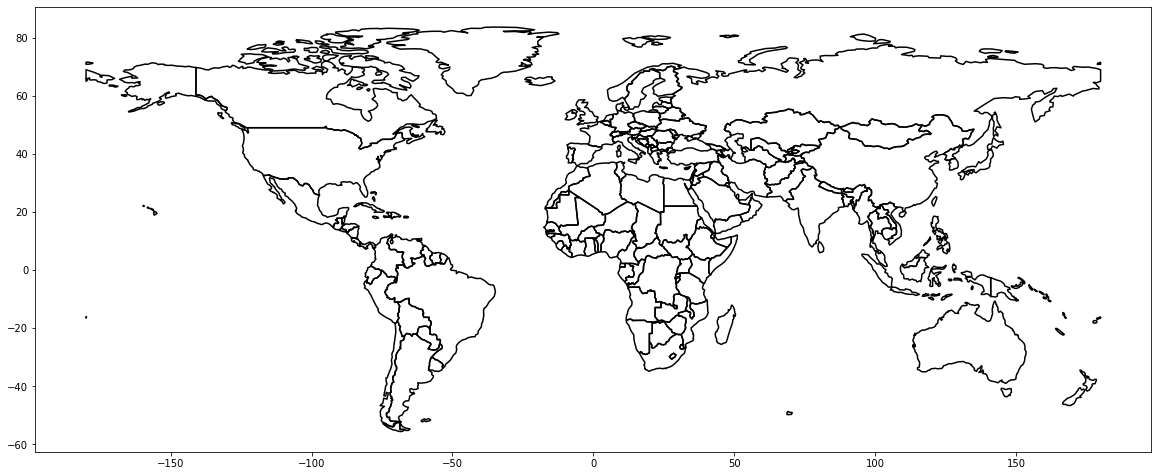

In [4]:
path = gpd.datasets.get_path('naturalearth_lowres')
world= gpd.read_file(path, crs='WGS84')

world= world[(world.name!="Antarctica")]
base = world.boundary.plot(figsize=(20, 20), color='black')

print(world.crs)
world_area = sum(world.to_crs("EPSG:3857").area)

### Tiles alone

In [5]:
# gdf.plot(figsize=(20,20), color='green');
# gdf.crs

### Both together

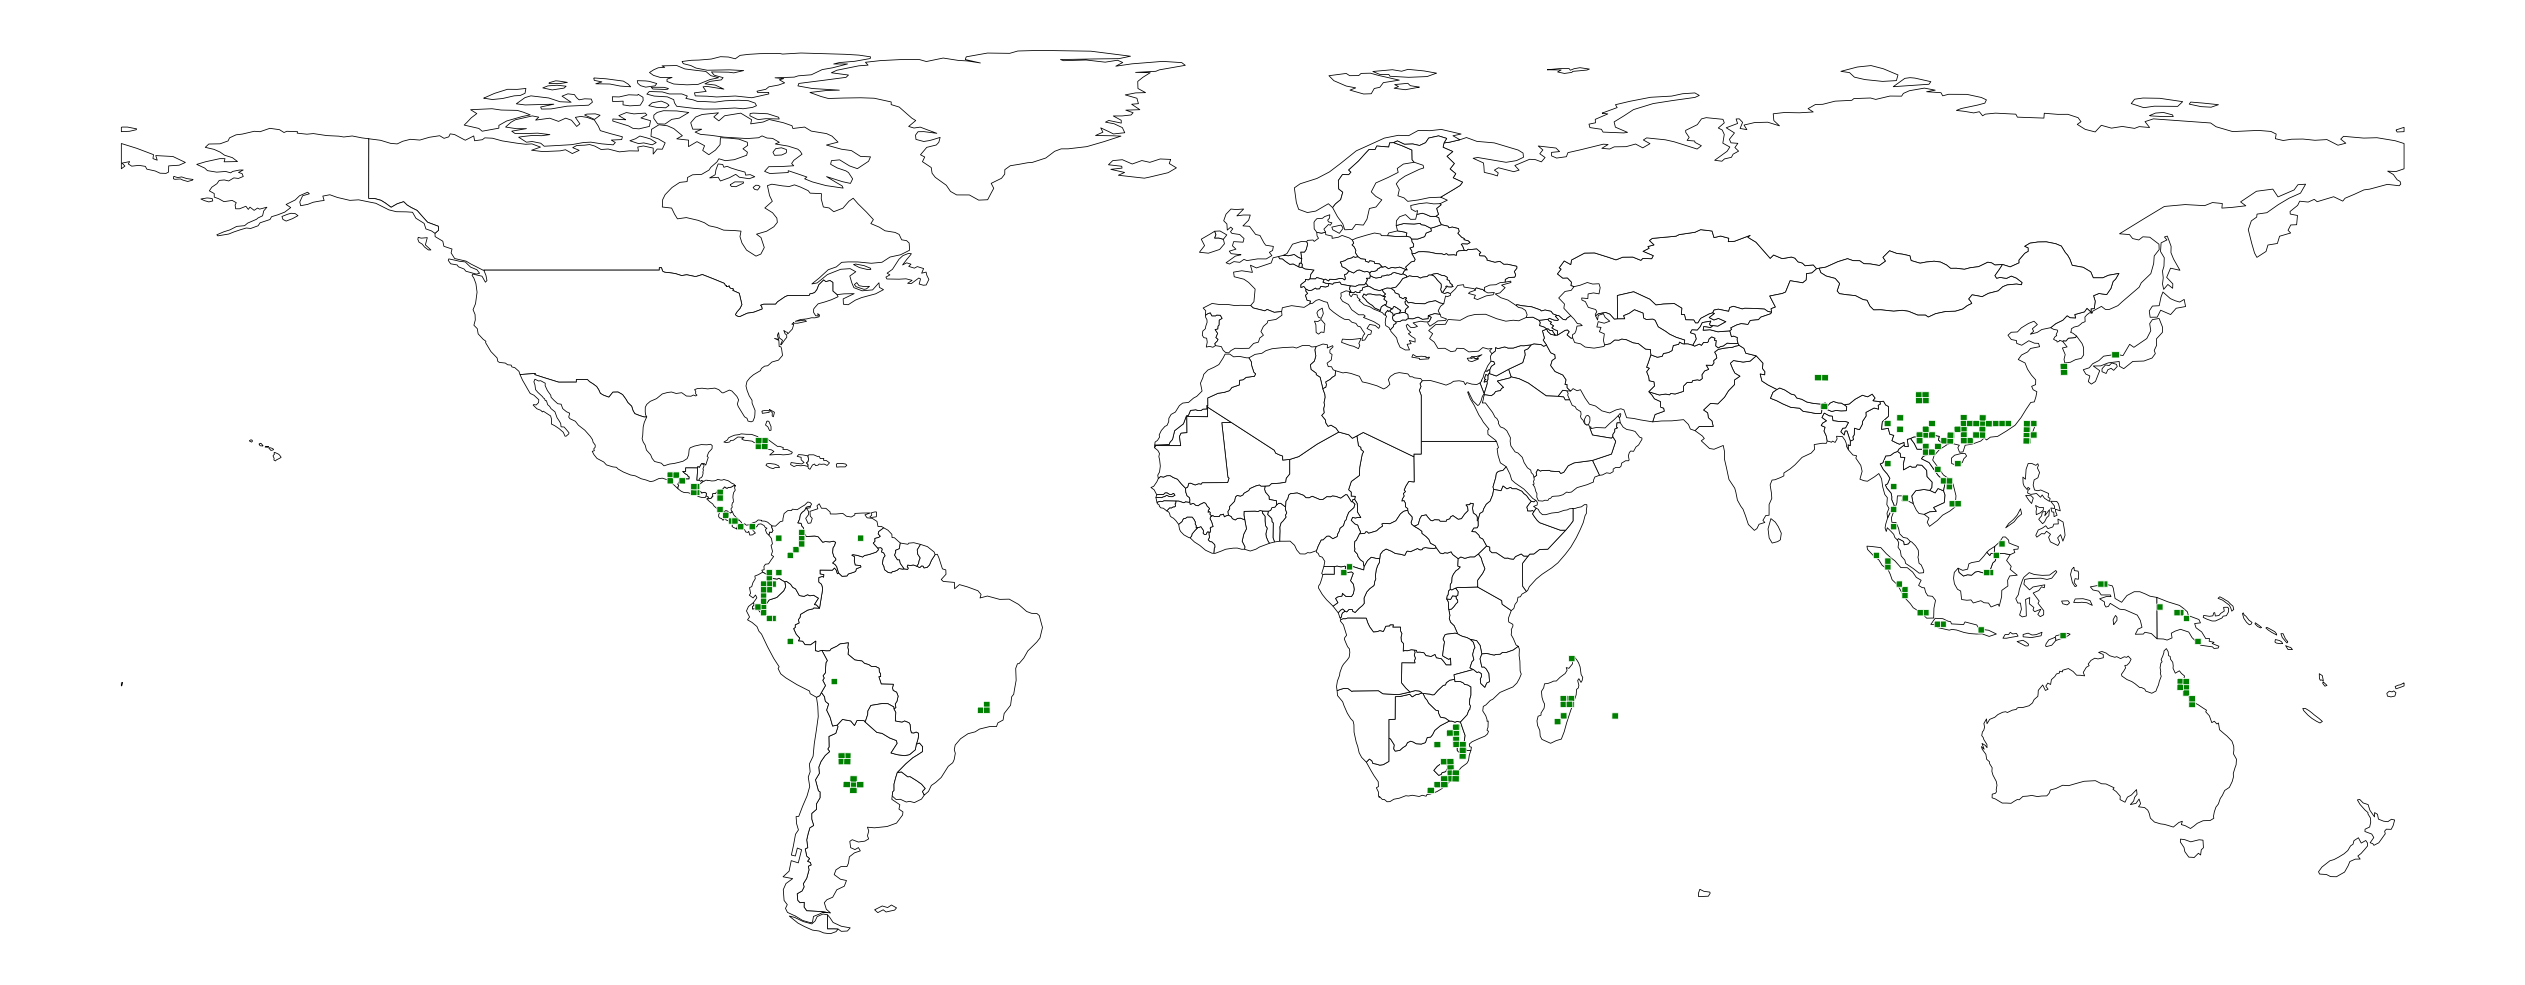

In [6]:
sns.set_theme(context='paper', font_scale=1.35)

base    = world.plot(figsize=(45 ,30), color='white', edgecolor='black')
ax_map  = gdf.plot(ax=base,  color='green')
plt.axis('off');

- logless figure

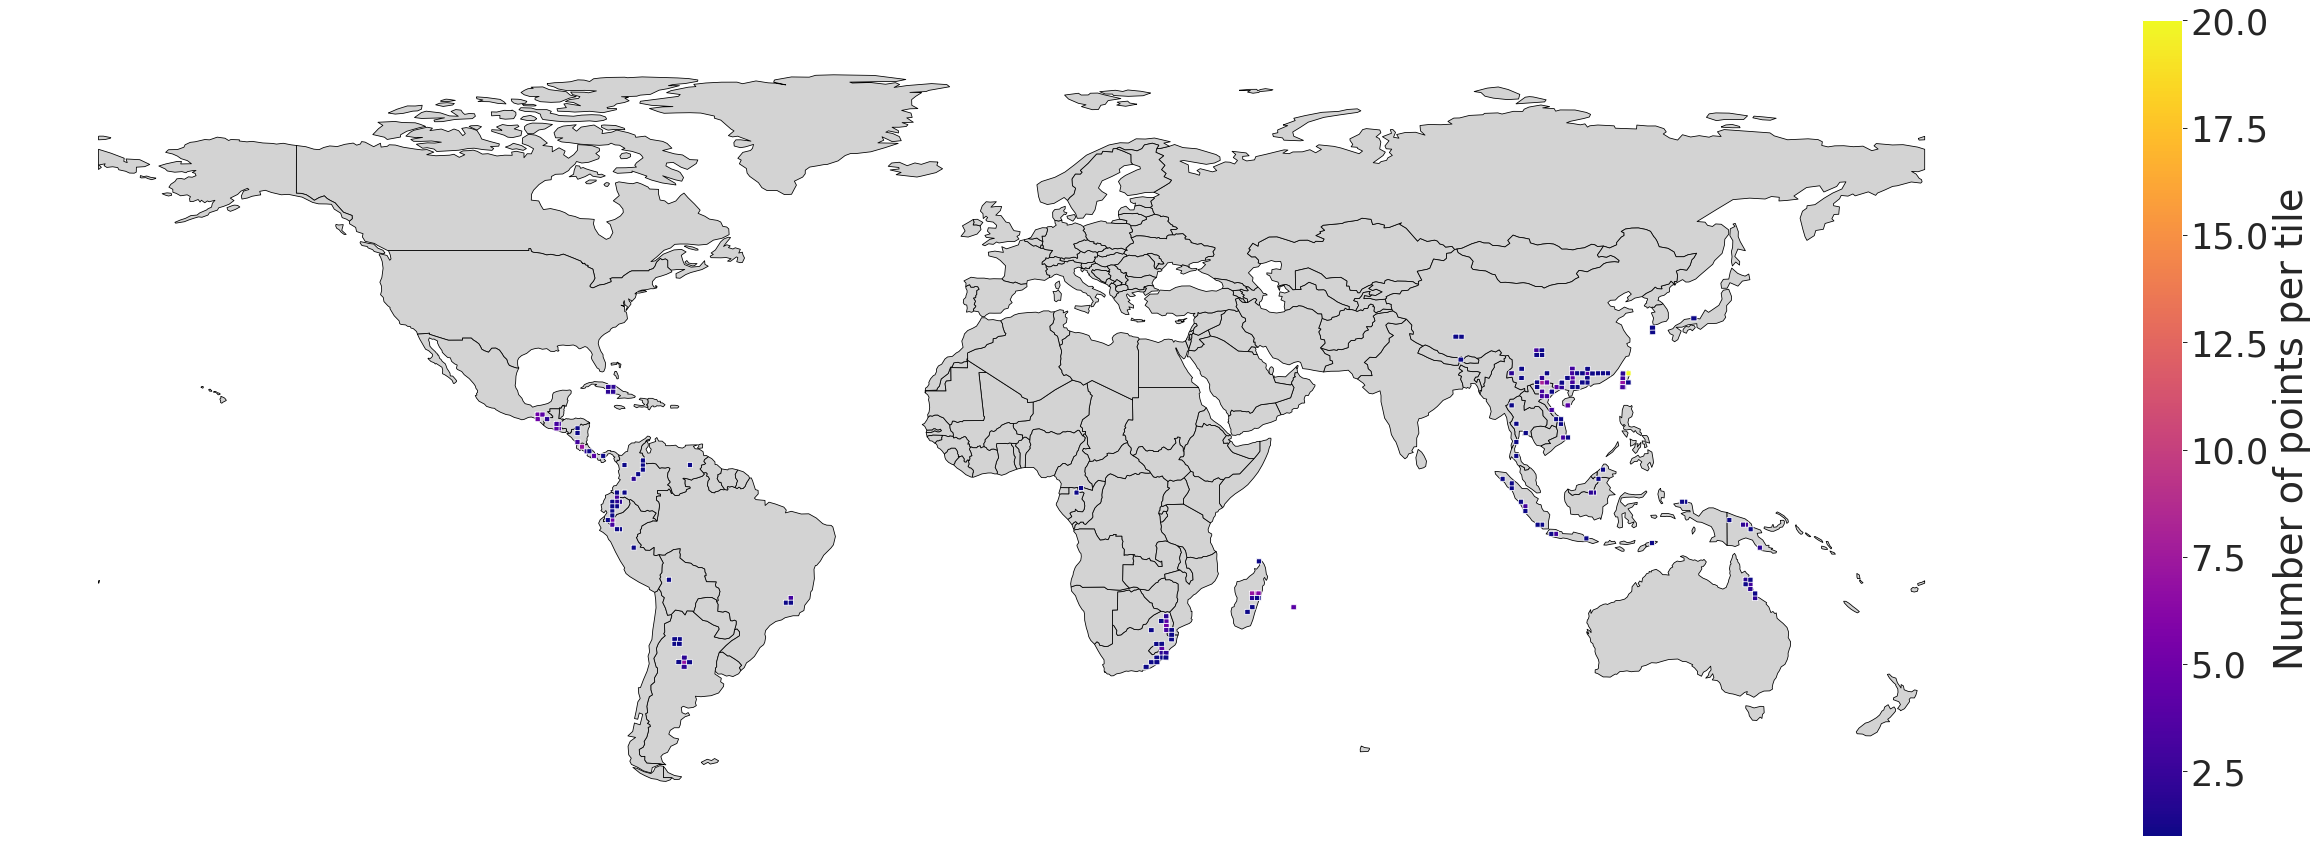

In [7]:
sns.set_theme(context='paper', font_scale=4)

base    = world.plot(figsize=(45 ,15), color='lightgrey', edgecolor='black')
ax_map  = gdf.plot(column="Nb_pts", ax=base, cmap='plasma', legend=True, 
                      legend_kwds={'label': "Number of points per tile"
                                  })
plt.axis('off');

In [8]:
# Saves fig
ax_map.figure.savefig("../figures/tiles_ditribution_map_default.png", bbox_inches='tight')

- log10 figure

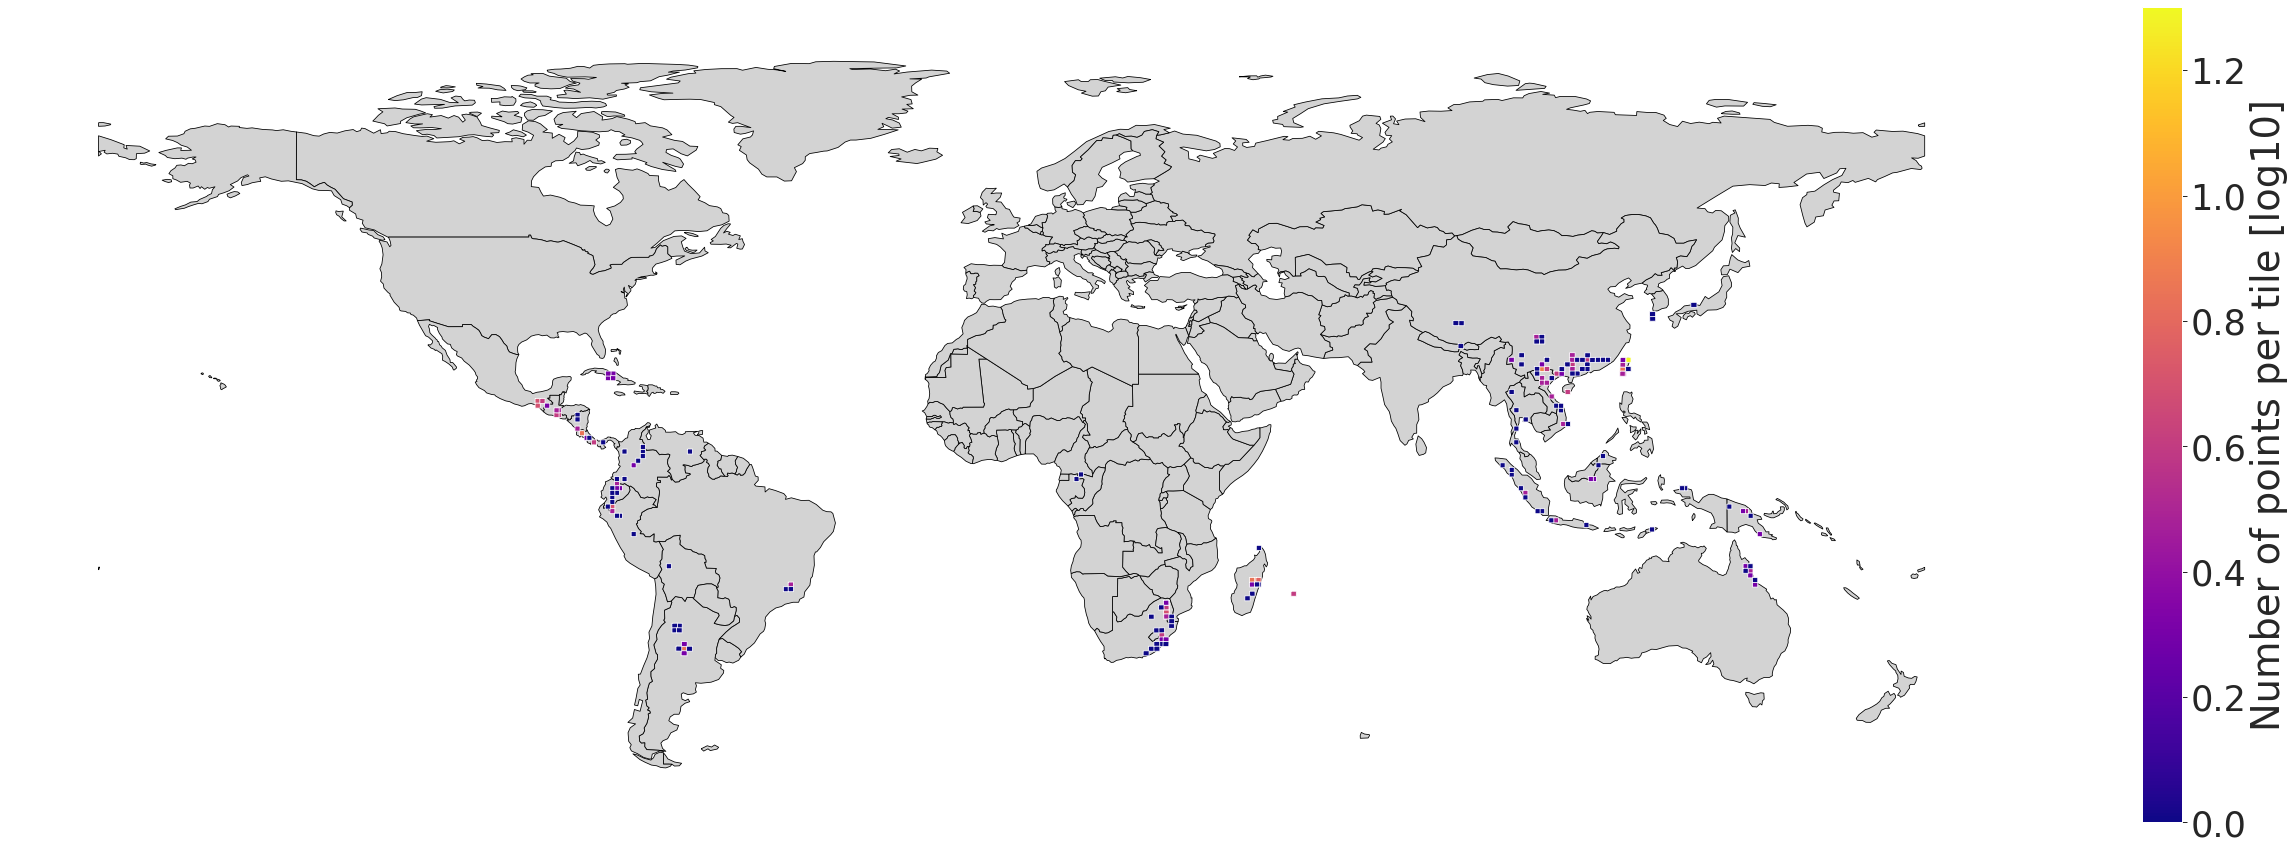

In [9]:
sns.set_theme(context='paper', font_scale=4)

base    = world.plot(figsize=(45 ,15), color='lightgrey', edgecolor='black')
ax_map  = gdf.plot(column="Nb_pts_log", ax=base, cmap='plasma', legend=True, 
                      legend_kwds={'label': "Number of points per tile [log10]"
                                  })
plt.axis('off');

# # Get colourbar from second axis
# colourbar = ax_map.get_figure().get_axes()[1]
# labels      = [item[1].get_text() for item in enumerate(colourbar.get_yticklabels())]
# print(labels)
# labels_hard = ['10⁰', '', '10¹', '', '10²', '', '10³', '', '10⁴']
# colourbar.set_yticklabels(labels_hard);

In [15]:
# # Saves fig
# ax_map.figure.savefig("../figures/tiles_ditribution_map_log_default.png", bbox_inches='tight')

- EPSG3857: https://gis.stackexchange.com/questions/48949/epsg-3857-or-4326-for-googlemaps-openstreetmap-and-leaflet